## Carga de datos

In [20]:
import pandas as pd
import numpy as np

df0 = pd.read_csv(u"datos_limpios/2010.csv")
df1 = pd.read_csv(u"datos_limpios/2011.csv")
df2 = pd.read_csv(u"datos_limpios/2012.csv")
df3 = pd.read_csv(u"datos_limpios/2013.csv")
df4 = pd.read_csv(u"datos_limpios/2014.csv")
print('50%')
df5 = pd.read_csv(u"datos_limpios/2015.csv")
df6 = pd.read_csv(u"datos_limpios/2016.csv")
df7 = pd.read_csv(u"datos_limpios/2017.csv")
df8 = pd.read_csv(u"datos_limpios/2018.csv")
df9 = pd.read_csv(u"datos_limpios/2019.csv")
print('100%')

50%


C:\Users\Javi\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (45) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


100%


# Exploración

Primero buscamos correlaciones en los datos, para ello aplicamos la técnica *One Hot* sobre las columnas con variables categóricas y luego buscamos una correlación entre las variables. 

In [ ]:
df_all = pd.concat([df0, df1, df2, df3, df4, df5, df6, df7, df8, df9])
correlation = df_all.corr()
correlation.to_csv('corr/corrAll.csv')

In [ ]:
df_sub = pd.concat([df1, df5, df9])

df_sub_datatypes = (pd.DataFrame(df_sub.dtypes)
                    .reset_index()
                    .rename(columns = {0:'tipo', 'index' : 'columna'})
                    )
                    
cols_name = list(df_sub)
init = cols_name.index("costo_proceso_titulacion") + 1
for i in range(init, len(df_sub_datatypes)):
    if str(df_sub_datatypes.iloc[i][1]) == 'object':
        col_name = df_sub_datatypes.iloc[i][0]
        # Columnas que no se consideran
        if col_name in ["provincia_sede","codigo_unico", "nomb_inst", "nomb_sede", "nomb_carrera", "acre_inst_desde_hasta", "costo_obtencion_titulo_diploma", "costo_tit_explicacion_observacion", "costo_proceso_titulacion"] :
            continue
        print("iniciando proceso para " + col_name)
        cols_name.remove(col_name)
        df_one_hot = pd.get_dummies(df_sub[[col_name]], prefix=col_name)
        print("guardando")
        df_one_hot.to_csv("one_hot/one_hot_" + col_name + ".csv", index = False)
        print("done")
print(cols_name)

In [ ]:
import pandas as pd

cols_name = ['cat_periodo', 'codigo_unico', 'MRUN', 'GEN_ALU', 'FEC_NAC_ALU', 'anio_ing_carr_ori', 'sem_ing_carr_ori', 'anio_ing_carr_act', 'sem_ing_carr_act', 'cod_inst', 'nomb_inst', 'cod_sede', 'nomb_sede', 'cod_carrera', 'nomb_carrera', 'version', 'dur_estudio_carr', 'dur_proceso_tit', 'dur_total_carr', 'provincia_sede', 'valor_matricula', 'valor_arancel', 'codigo_demre', 'acre_inst_desde_hasta', 'acre_inst_anio', 'costo_proceso_titulacion', 'costo_obtencion_titulo_diploma', 'costo_tit_explicacion_observacion']
ddf_sub_one_hot = pd.concat([df1, df5, df9])[cols_name]

for col in list(df_sub):
    if not (col in cols_name):
        print(col)
        df_aux = pd.read_csv("one_hot/one_hot_" + col + ".csv")
        df_sub_one_hot = pd.merge(df_sub_one_hot, df_aux, left_index=True, right_index=True)

df_sub_one_hot.to_csv("matriculas2011-2015-2019.csv", index = False)

In [18]:
corr_sub = df_sub_one_hot.corr()
corr_sub.to_csv("corr/corr_2011_2015_2019_oneHot.csv")

In [23]:
d = [df0, df1, df2, df3, df4, df5, df6, df7, df8, df9]
nulos, l, l_total, anno, porcentaje = [], [], [], [], []
i = 2010

for df in d:
    n = 0
    for v in list(df.isnull().sum()):
        n += v
    anno.append(i)
    nulos.append(n)
    t = len(df)*len(list(df))*1.0
    l.append(len(df))
    porcentaje.append((n/t)*100)
    i+=1

df_datos_faltantes = pd.read_csv('datos_faltantes.csv')

<ipython-input-24-53e2dbe34289>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_total_datos.show()
<ipython-input-24-53e2dbe34289>:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_porcentaje_nulo.show()


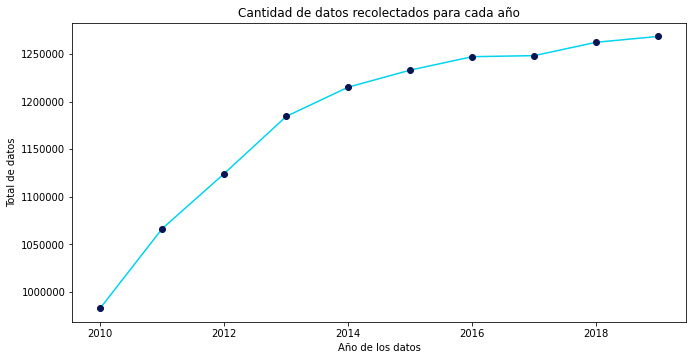

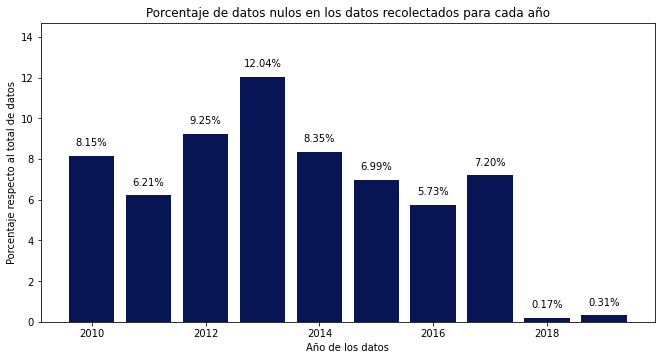

In [24]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [11, 5.5]


fig_total_datos = plt.figure()
fig_total_datos.clf()
ax_total_datos = fig_total_datos.add_subplot(111)
#ax_total_datos.bar(anno, l, align='center', alpha=0.7, color = 'darkorange', label = "Entradas en la tabla")
ax_total_datos.plot(anno, l, alpha=1, color = '#00d4f0', label = "Entradas en la tabla")
ax_total_datos.plot(anno, l, 'o', alpha=1, color = '#071554', label = "Entradas en la tabla")
ax_total_datos.set_ylabel("Total de datos")
ax_total_datos.set_xlabel("Año de los datos")
ax_total_datos.set_title("Cantidad de datos recolectados para cada año")
#set off Scientific notation from Y-axis
ax_total_datos.get_yaxis().get_major_formatter().set_useOffset(False)
ax_total_datos.get_yaxis().get_major_formatter().set_scientific(False)
#ax_total_datos.legend(loc="best")
fig_total_datos.savefig("total_datos.png", transparent=False)
fig_total_datos.show()


fig_porcentaje_nulo = plt.figure()
fig_porcentaje_nulo.clf()
ax_porcentaje_nulo = fig_porcentaje_nulo.add_subplot(111)
graph = ax_porcentaje_nulo.bar(anno, porcentaje, align='center', color = '#071554', label = "Porcentaje de datos nulos")
ax_porcentaje_nulo.bar([2016], [14], align='center', alpha=0)
ax_porcentaje_nulo.set_ylabel("Porcentaje respecto al total de datos")
ax_porcentaje_nulo.set_xlabel("Año de los datos")
ax_porcentaje_nulo.set_title("Porcentaje de datos nulos en los datos recolectados para cada año")
#fig_porcentaje_nulo.legend(loc="upper left")
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    num = str(porcentaje[i]).split(".")
    t = num[0] +'.' + num[1][:2]+'%'
    plt.text(x+width/2,
             y+0.5+height*1,
             t,
             ha='center')
             #weight='bold')
    i+=1
fig_porcentaje_nulo.savefig("porcentaje_datos_nulos.png", transparent=False)
fig_porcentaje_nulo.show()

In [ ]:
df_porcentaje_total = pd.DataFrame({"porcentaje_total":porcentaje})

df_datos_faltantes["proporcion"]=(100*df_datos_faltantes[["porcentaje"]])/df_porcentaje_total[["porcentaje_total"]]

df_datos_faltantes[["porcentaje_total"]]=df_porcentaje_total[["porcentaje_total"]]
df_datos_faltantes.rename(columns={"porcentaje":"porcentaje_datos_faltantes"}).to_csv("datos_faltantes.csv", index = False)

In [ ]:
# Esta celda se demora harto, hacerla correr con precaucion

plt.rcParams['figure.figsize'] = [18, 15]
df8.hist()
pyplot.show()

pd.plotting.scatter_matrix(df8)
pyplot.show()

## Comportamiento del set de datos

**¿Cómo se relaciona el área de conocimiento de la carrera con la edad y género de la persona que se matricula?**

In [25]:
# se analiza por año y luego se promedia
d = [df0, df1, df2, df3, df4, df5, df6, df7, df8, df9]
h1 = []
i = 2010

for df in d:
    dfh = (df.query("area_conocimiento!='Sin área definida' and (nivel_global=='Pregrado' or nivel_global.isnull())")[["GEN_ALU","rango_edad", "area_conocimiento"]]
        .groupby(by=["GEN_ALU","rango_edad", "area_conocimiento"])
        .size()
        .reset_index()
        .rename(columns = {0:'total'})
        )
    dfh["anio"] = [i]*len(dfh)
    i+=1

    h1.append(dfh.copy())

#concatenación y mapeo
dfh1 = (pd.concat(h1)[["GEN_ALU","rango_edad", "area_conocimiento", "total"]]
                 .groupby(by=["GEN_ALU","rango_edad", "area_conocimiento"])
                 .mean()
                 .reset_index()
                )
dfh1[["GEN_ALU"]] = dfh1[["GEN_ALU"]].replace({1:"Hombre", 2:"Mujer"})
dfh1 = (dfh1.replace({"SIN INFORMACION": "Sin información", "Ciencias Sociales": "C. Sociales"}))

In [26]:
a = (dfh1[["GEN_ALU", "area_conocimiento", "total"]]
        .sort_values(by=["GEN_ALU", "area_conocimiento"])
        .groupby(by=["GEN_ALU", "area_conocimiento"])
        .sum()
        .reset_index()
        )
a[["total"]] = a[["total"]].astype(np.int64)
a = a.rename(columns={"area_conocimiento":"target", "GEN_ALU":"source", "total":"value"})

b = (dfh1[["rango_edad", "area_conocimiento", "total"]]
        .sort_values(by=["rango_edad", "area_conocimiento"])
        .groupby(by=["rango_edad", "area_conocimiento"])
        .sum()
        .reset_index()
        )
b[["total"]] = b[["total"]].astype(np.int64)
b = b.rename(columns={"rango_edad":"target", "area_conocimiento":"source", "total":"value"})

df_sankey = pd.concat([a,b])
df_sankey.to_csv("sankey_data.csv", index=False)

**¿Existe una correlación entre el costo de las carreras y su ubicación geográfica? ¿Varía esto a través de los años?**

In [27]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

d = [df1, df3, df5, df7, df9]
h2 = []
i = 2011

for df in d:
    try:
        dfh = df.query("vigencia_carrera!='NO VIGENTE'")
    except:
        dfh = df
    dfh = (dfh[["codigo_unico","valor_arancel", "region_sede"]]
           .drop_duplicates()[["region_sede", "valor_arancel"]]
           .groupby(["region_sede"])
           .mean()
           .reset_index()
           .rename(columns = {"valor_arancel":'arancel_promedio_pesos'})
        )
    dfh["anio"] = [i]*len(dfh)
    i+=1
    h2.append(dfh.copy())

df_arancel_original = pd.concat(h2)

df_UF = pd.read_csv("UF.csv").rename(columns={"Periodo": "anio"})
df_UF["UF"] = df_UF["UF"].astype(float)
df_arancel_original = pd.merge(df_arancel_original, df_UF, how = "inner", on = ["anio"])
df_arancel_original["arancel_promedio_UF"] = df_arancel_original.arancel_promedio_pesos/df_arancel_original.UF
df_arancel_original = df_arancel_original[["anio", "region_sede", "arancel_promedio_UF"]].sort_values("anio", ascending = False)

df_arancel_mapeado = (df_arancel_original.replace({'Arica y Parinacota': 1, 'Tarapacá': 2, 'Antofagasta': 3, 'Atacama': 4, 'Coquimbo': 5, 'Valparaíso': 6, 'Metropolitana': 7, "Lib. Gral B. O'Higgins": 8, 'Maule': 9, 'Ñuble': 10, 'Biobío': 11, 'La Araucanía': 12, 'Los Ríos': 13, 'Los Lagos': 14, 'Aysén': 15, 'Magallanes': 16}))
df_arancel_mapeo_regiones = pd.DataFrame({"Region": ['Arica y Parinacota', 'Tarapacá', 'Antofagasta', 'Atacama', 'Coquimbo', 'Valparaíso', 'Metropolitana', "Lib. Gral B. O'Higgins", 'Maule', 'Ñuble', 'Biobío', 'La Araucanía', 'Los Ríos', 'Los Lagos', 'Aysén', 'Magallanes'], "Equivalente": list(range(1,17))})

In [ ]:
df_arancel_original.to_csv("h2_original.csv", index=False, sep=';', decimal=',')

In [ ]:
anio_list, region_sede_list, arancel_list = [], [], []
for i in list(range(2011, 2021)):
    anio_list.extend([i, i])
    region_sede_list.extend(["Galicia", "Canarias"])
    arancel_list.extend([51.17, 91.42])

df_extremos = pd.DataFrame({"anio":anio_list, "region_sede":region_sede_list, "arancel_promedio_UF":arancel_list})

pd.concat([df_extremos,df_arancel_original]).to_csv("arancel_original_2.csv", index=False, sep=';', decimal=',')